In [11]:
import numpy as np
import umap
import hdbscan
import pickle

In [24]:
with open("../../Data/Embeddings_old/20_ng_text_embeddings.pkl", "rb") as f:
    data = pickle.load(f)

In [27]:
embeddings = data["embedding"]
texts = data["text"]

In [31]:
ump = umap.UMAP(n_neighbors=30, min_dist=0, metric="cosine", random_state=42, verbose=True, n_components=20)
ump.fit(embeddings)
ump_embedding = ump.transform(embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0, n_components=20, n_neighbors=30, random_state=42, verbose=True)
Fri Jul 21 14:06:19 2023 Construct fuzzy simplicial set
Fri Jul 21 14:06:20 2023 Finding Nearest Neighbors
Fri Jul 21 14:06:20 2023 Building RP forest with 12 trees
Fri Jul 21 14:06:20 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Fri Jul 21 14:06:24 2023 Finished Nearest Neighbor Search
Fri Jul 21 14:06:25 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:34]


Fri Jul 21 14:07:00 2023 Finished embedding


UMAP(angular_rp_forest=True, metric='cosine', min_dist=0, n_neighbors=30, random_state=42, verbose=True)
Fri Jul 21 14:07:46 2023 Construct fuzzy simplicial set
Fri Jul 21 14:07:46 2023 Finding Nearest Neighbors
Fri Jul 21 14:07:46 2023 Building RP forest with 12 trees
Fri Jul 21 14:07:47 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Fri Jul 21 14:07:51 2023 Finished Nearest Neighbor Search
Fri Jul 21 14:07:51 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:18]


Fri Jul 21 14:08:11 2023 Finished embedding


C:\Users\arik_\AppData\Local\Temp\ipykernel_27928\1013081128.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(ump_embedding2[:, 0], ump_embedding2[:, 1], s=0.1, cmap="Spectral")


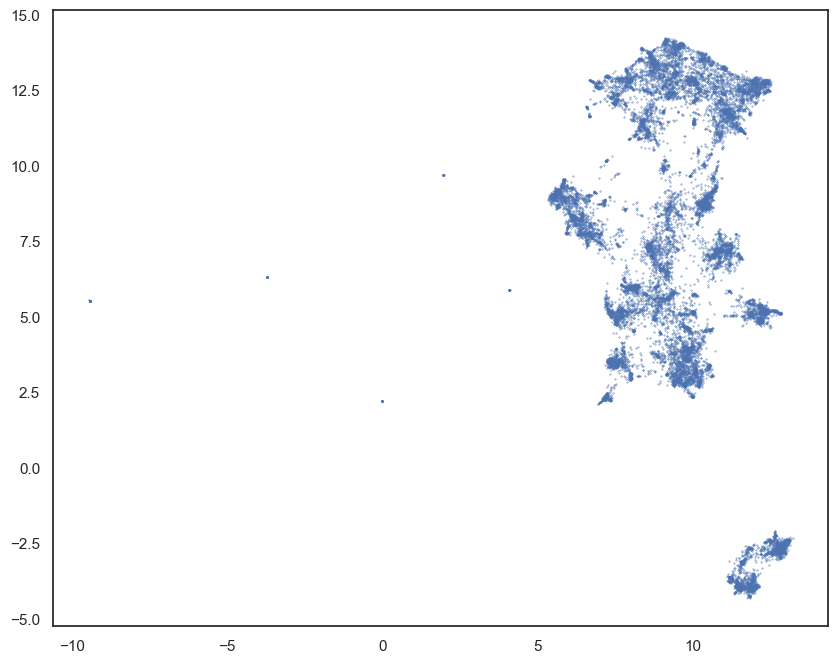

In [33]:
#  compute embedding in 2d and plot result
ump2 = umap.UMAP(n_neighbors=30, min_dist=0, metric="cosine", random_state=42, verbose=True, n_components=2)
ump2.fit(embeddings)
ump_embedding2 = ump2.transform(embeddings)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", rc={"figure.figsize": (10, 8)})
plt.scatter(ump_embedding2[:, 0], ump_embedding2[:, 1], s=0.1, cmap="Spectral")
plt.show()

In [53]:
?hdbscan.HDBSCAN.fit_predict

Signature: hdbscan.HDBSCAN.fit_predict(self, X, y=None)
Docstring:
Performs clustering on X and returns cluster labels.

Parameters
----------
X : array or sparse (CSR) matrix of shape (n_samples, n_features), or                 array of shape (n_samples, n_samples)
    A feature array, or array of distances between samples if
    ``metric='precomputed'``.

Returns
-------
y : ndarray, shape (n_samples, )
    cluster labels
File:      c:\users\arik_\anaconda3\envs\llm_sem\lib\site-packages\hdbscan\hdbscan_.py
Type:      function

In [56]:
from sklearn.datasets import make_blobs
blobs, labels = make_blobs(n_samples=2000, n_features=10)
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
clusterer.fit(blobs)


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [54]:
# fit hdbscan
clusterer = hdbscan.HDBSCAN(metric="euclidean", min_cluster_size=10, min_samples=1, cluster_selection_method="eom", prediction_data=True)
clusterer.fit_predict(ump_embedding.astype(np.float32))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [35]:
# plot result assignment of documents to clusters 
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette("deep", 8))
plt.show()


AttributeError: No condensed tree was generated; try running fit first.